Biopython trial

In [85]:
from Bio import Entrez
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("poster")

#replace with whoever is using this
Entrez.email = 'masashi.omori@gmail.com'

In [45]:
#Find how many articles on asthma we can find on PubMed
handle = Entrez.egquery(term='asthma')
record = Entrez.read(handle)
for row in record['eGQueryResult']:
    if row['DbName']=='pubmed':
        print(row['Count'])

173418


In [77]:
#use Bio.Entrez.efetch function to donwload PubMed IDs of these articles
from Bio import Entrez
handle = Entrez.esearch(db='pubmed', term='asthma',retmax=100000)
record = Entrez.read(handle)
handle.close()
idlist = record["IdList"]
idlist[:10]


['29980042',
 '29979628',
 '29979621',
 '29979102',
 '29978485',
 '29978021',
 '29977901',
 '29977782',
 '29977780',
 '29977658']

In [81]:
#Use medline records in medline flat-file format and use Bio.Medline to parse them
from Bio import Medline
handle = Entrez.efetch(db='pubmed', id=idlist, rettype='medline', retmode='text')
records = Medline.parse(handle)

In [78]:
#records is an ITERATOR, ie you can only iterate them once. Convert to list if you want to save them
#records = list(records)

In [51]:
# #print out some information
# print 'title: {}'.format(records[1].get("TI","?"))
# print 'authors: {}'.format(records[1].get("AU","?"))
# print "source: {}".format(records[1].get("SO","?"))

title: Early Life Weight Gain and Development of Childhood Asthma in a Prospective Birth Cohort.
authors: ['Tsai HJ', 'Wang G', 'Hong X', 'Yao TC', 'Ji Y', 'Radovick S', 'Ji H', 'Cheng TL', 'Wang X']
source: Ann Am Thorac Soc. 2018 Jul 6. doi: 10.1513/AnnalsATS.201712-921OC.


In [82]:
tuples = []
for record in records:
    try:
        title = record['TI']
        authors = record['AU']
        crdt = record['CRDT'][0][:10]
    except Exception as e:
        continue
    tuples.append((title, authors, crdt))
pubmed_df = pd.DataFrame(tuples, columns=['title','authors','crdt'])

In [86]:
pubmed_df.head(2)

,title,authors,crdt
0,Cardiovascular function and ozone exposure: Th...,"[Rich DQ, Balmes JR, Frampton MW, Zareba W, St...",2018/07/07
1,Early Life Weight Gain and Development of Chil...,"[Tsai HJ, Wang G, Hong X, Yao TC, Ji Y, Radovi...",2018/07/07


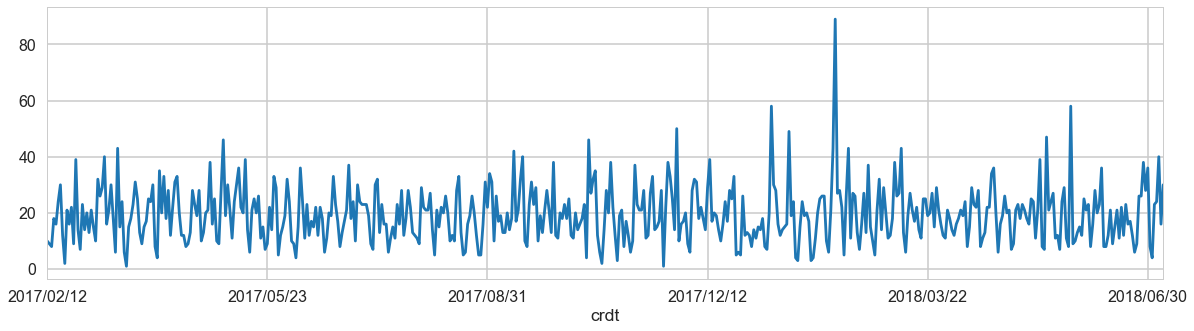

In [93]:
pubmed_df_counts = pubmed_df.groupby('crdt').size()    
pubmed_df_counts.plot(figsize=(20,5))